In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.txt')
test = pd.read_csv('test.txt')

In [3]:
train = train.drop(['Unnamed: 0'], axis = 1)
test = test.drop(['Unnamed: 0'], axis = 1)

In [4]:
train.head()

,TIMESTAMP,date_Y,date_M,date_D,date_H,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,duration,haversine,speed
0,1.372645e+09,2013,7,1,10,C,0.0,0.0,20000542,285,2699.525658,9.472020
1,1.372663e+09,2013,7,1,15,B,0.0,15.0,20000542,990,3714.635135,3.752157
2,1.372666e+09,2013,7,1,15,B,0.0,15.0,20000542,1110,6961.118842,6.271278
3,1.372670e+09,2013,7,1,17,B,0.0,15.0,20000542,840,5106.289381,6.078916
4,1.372671e+09,2013,7,1,17,A,43436.0,0.0,20000542,315,1116.428898,3.544219


In [5]:
test.head()

,TIMESTAMP,date_Y,date_M,date_D,date_H,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,duration,haversine,speed
0,1408039037,2014,8,15,1,B,0.0,15.0,20000542,150,221.327676,1.475518
1,1408038611,2014,8,15,1,B,0.0,57.0,20000108,585,2140.926138,3.659703
2,1408038568,2014,8,15,1,B,0.0,15.0,20000370,585,2315.694331,3.958452
3,1408039090,2014,8,15,1,B,0.0,53.0,20000492,105,60.304932,0.574333
4,1408039177,2014,8,15,1,B,0.0,18.0,20000621,15,0.753580,0.050239


# EDA

In [14]:
train[train['date_Y'] ==2013].shape

(500058, 12)

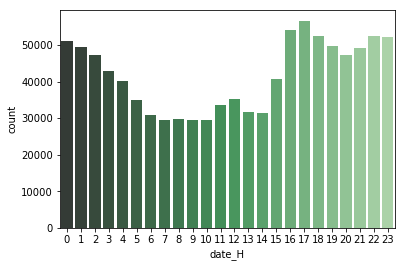

In [27]:
sns.countplot(x="date_H", data=train, palette="Greens_d")

# EDA

In [6]:
test.date_Y.unique().tolist()

[2014]

In [7]:
print('value:', test.date_Y.unique().tolist(), 'unique:', len(test.date_Y.unique().tolist()))
print('value:', test.date_M.unique().tolist(), 'unique:', len(test.date_M.unique().tolist()))
print('value:', test.date_D.unique().tolist(), 'unique:', len(test.date_D.unique().tolist()))
print('value:', test.date_H.unique().tolist(), 'unique:', len(test.date_H.unique().tolist()))         

value: [2014] unique: 1
value: [8, 9, 10, 11, 12] unique: 5
value: [15, 30, 7, 6, 1, 21] unique: 6
value: [1, 0, 16, 15, 14, 23, 11, 10, 22, 20, 19, 21] unique: 12


In [8]:
print('value:', train.date_Y.unique().tolist(), 'unique:', len(train.date_Y.unique().tolist()))
print('value:', train.date_M.unique().tolist(), 'unique:', len(train.date_M.unique().tolist()))
print('value:', train.date_D.unique().tolist(), 'unique:', len(train.date_D.unique().tolist()))
print('value:', train.date_H.unique().tolist(), 'unique:', len(train.date_H.unique().tolist())) 

value: [2013, 2014] unique: 2
value: [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6] unique: 12
value: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] unique: 31
value: [10, 15, 17, 18, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 8, 9, 11, 16, 19, 0, 14, 7, 12, 13] unique: 24


In [9]:
print(train.shape, test.shape)

(1000788, 12) (320, 12)


# on hot encoding

In [10]:
duration_train = train[['duration']]
haversine_train = train[['haversine']]
speed_train = train[['speed']]
duration_test = test[['duration']]
haversine_test = test[['haversine']]
speed_test = test[['speed']]

In [11]:
CTrain = pd.get_dummies( train.CALL_TYPE , prefix='CALL_TYPE' )
CTest = pd.get_dummies( test.CALL_TYPE , prefix='CALL_TYPE' )
print('CTrain:', CTrain.shape, '\n', 'CTest:', CTest.shape)

CTrain: (1000788, 3) 
 CTest: (320, 3)


In [12]:
TItrain = pd.get_dummies( train.TAXI_ID , prefix='TI' )
TItest = pd.get_dummies( test.TAXI_ID , prefix='TI' )
print('TItrain:', TItrain.shape, '\n', 'TItest:', TItest.shape)

TItrain: (1000788, 244) 
 TItest: (320, 244)


In [13]:
Ytrain = pd.get_dummies( train.date_Y , prefix='Y' )
Ytest = pd.get_dummies( test.date_Y , prefix='Y' )
Ytest['Y_2013'] =np.zeros(320)
Ytest = Ytest[['Y_2013', 'Y_2014']]
print('Ytrain:', Ytrain.shape, '\n', 'Ytest:', Ytest.shape)

Ytrain: (1000788, 2) 
 Ytest: (320, 2)


In [14]:
Mtrain = pd.get_dummies( train.date_M , prefix='M' )
Mtest = pd.get_dummies( test.date_M , prefix='M' )
Mtest['M_1'] =np.zeros(320)
Mtest['M_2'] =np.zeros(320)
Mtest['M_3'] =np.zeros(320)
Mtest['M_4'] =np.zeros(320)
Mtest['M_5'] =np.zeros(320)
Mtest['M_6'] =np.zeros(320)
Mtest['M_7'] =np.zeros(320)
Mtest = Mtest[Mtrain.columns]
print('Mtrain:', Mtrain.shape, '\n', 'Mtest:', Mtest.shape)

Mtrain: (1000788, 12) 
 Mtest: (320, 12)


In [15]:
Dtrain = pd.get_dummies( train.date_D , prefix='D' )
Dtest = pd.get_dummies( test.date_D , prefix='D' )
Dtest['D_2'] =np.zeros(320)
Dtest['D_3'] =np.zeros(320)
Dtest['D_4'] =np.zeros(320)
Dtest['D_5'] =np.zeros(320)
Dtest['D_8'] =np.zeros(320)
Dtest['D_9'] =np.zeros(320)
Dtest['D_10'] =np.zeros(320)
Dtest['D_11'] =np.zeros(320)
Dtest['D_12'] =np.zeros(320)
Dtest['D_13'] =np.zeros(320)
Dtest['D_14'] =np.zeros(320)
Dtest['D_16'] =np.zeros(320)
Dtest['D_17'] =np.zeros(320)
Dtest['D_18'] =np.zeros(320)
Dtest['D_19'] =np.zeros(320)
Dtest['D_20'] =np.zeros(320)
Dtest['D_22'] =np.zeros(320)
Dtest['D_23'] =np.zeros(320)
Dtest['D_24'] =np.zeros(320)
Dtest['D_25'] =np.zeros(320)
Dtest['D_26'] =np.zeros(320)
Dtest['D_27'] =np.zeros(320)
Dtest['D_28'] =np.zeros(320)
Dtest['D_29'] =np.zeros(320)
Dtest['D_31'] =np.zeros(320)
Dtest = Dtest[Dtrain.columns]
print('Dtrain:', Dtrain.shape, '\n', 'Dtest:', Dtest.shape)

Dtrain: (1000788, 31) 
 Dtest: (320, 31)


In [16]:
Htrain = pd.get_dummies( train.date_H , prefix='H' )
Htest = pd.get_dummies( test.date_H , prefix='H' )
Htest['H_2'] =np.zeros(320)
Htest['H_3'] =np.zeros(320)
Htest['H_4'] =np.zeros(320)
Htest['H_5'] =np.zeros(320)
Htest['H_6'] =np.zeros(320)
Htest['H_7'] =np.zeros(320)
Htest['H_8'] =np.zeros(320)
Htest['H_9'] =np.zeros(320)
Htest['H_12'] =np.zeros(320)
Htest['H_13'] =np.zeros(320)
Htest['H_17'] =np.zeros(320)
Htest['H_18'] =np.zeros(320)
Htest = Htest[Htrain.columns]
print('Htrain:', Htrain.shape, '\n', 'Htest:', Htest.shape)

Htrain: (1000788, 24) 
 Htest: (320, 24)


In [17]:
train_final = pd.concat([CTrain, TItrain, Ytrain, Mtrain, Dtrain, Htrain, haversine_train, duration_train], ignore_index= False, axis= 1 )

In [18]:
test_final = pd.concat([CTest, TItest, Ytest, Mtest, Dtest, Htest, haversine_test , duration_test], ignore_index= False, axis= 1 )

In [19]:
test_final.head()

,CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C,TI_20000004,TI_20000005,TI_20000008,TI_20000009,TI_20000010,TI_20000012,TI_20000015,...,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23,haversine,duration
0,0,1,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,221.327676,150
1,0,1,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,2140.926138,585
2,0,1,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,2315.694331,585
3,0,1,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,60.304932,105
4,0,1,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0.753580,15


In [20]:
train_final.head()

,CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C,TI_20000004,TI_20000005,TI_20000008,TI_20000009,TI_20000010,TI_20000012,TI_20000015,...,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23,haversine,duration
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2699.525658,285
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3714.635135,990
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6961.118842,1110
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,5106.289381,840
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1116.428898,315


In [72]:
train_s = train_final.sample(frac=0.01, replace=True)

In [104]:
train_s.head()

,CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C,TI_20000004,TI_20000005,TI_20000008,TI_20000009,TI_20000010,TI_20000012,TI_20000015,...,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23,haversine,duration
779999,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3184.905185,825
186525,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2866.420187,450
84985,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2410.225801,810
312627,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2148.923203,795
918004,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0


In [74]:
train_final.shape

(1000788, 318)

# build the model

In [75]:
from sklearn.preprocessing  import StandardScaler
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score, mean_squared_log_error, mean_absolute_error, mean_squared_log_error

In [76]:
X = train_s.iloc[:, 0:-1]
Y = train_s.loc[:,['duration']]
vaild_X = test_final.iloc[:, 0:-1]
vaild_Y = test_final.loc[:,['duration']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 889)

In [78]:
y_train.shape

(8006, 1)

In [79]:
y_test.shape

(2002, 1)

# DTR

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
DTR = DecisionTreeRegressor(random_state=889)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=889, splitter='best')

## test set

In [82]:
DTR_predict=DTR.predict(X_test)
mean_squared_log_error(DTR_predict, y_test)

0.4446998899199996

## training set

In [83]:
DTR_vaild = DTR.predict(vaild_X)
mean_squared_log_error(DTR_vaild, vaild_Y)

1.5534709913971803

In [84]:
#DTR_vaild

# RFR

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
RFR = RandomForestRegressor(random_state=889, n_estimators=100)
RFR.fit(X_train, y_train)

C:\Users\hahohy889\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=889, verbose=0, warm_start=False)

## test set

In [94]:
RFR_predict=RFR.predict(X_test)
mean_squared_log_error(RFR_predict, y_test)

0.31318884356083243

### training set

In [89]:
RFR_vaild = RFR.predict(vaild_X)
mean_squared_log_error(RFR_vaild, vaild_Y)

1.3474952253083463

In [116]:
RFR_vaild

array([  606.75      ,  2096.4       ,   544.075     ,   639.5625    ,
         685.3       ,  1451.15      ,   680.9875    ,   691.65      ,
         532.8       ,   781.5       ,   636.55      ,   675.21428571,
         623.46428571,   713.58928571,   639.06428571,   675.3       ,
         704.06428571,   788.61428571,   824.1       ,   935.16428571,
         831.3       ,   660.45      ,   681.3       ,   854.2       ,
         610.9875    ,   610.6875    ,   614.7       ,   700.2       ,
         882.9       ,   771.        ,   651.2       ,   867.675     ,
         809.16428571,   746.58428571,   647.01428571,   682.26428571,
         778.95      ,   640.6875    ,  1347.975     ,   597.32571429,
         873.77166667,   589.26428571,  2987.85      ,   421.25      ,
         591.4       ,   479.5375    ,   769.56428571,   684.51428571,
         723.475     ,  1044.75      ,  1076.7       ,   570.2625    ,
         894.        ,   793.1       ,   623.5       ,   957.        ,
      

# GBDT

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

In [91]:
GBDT = GradientBoostingRegressor(random_state=889)
GBDT.fit(X_train, y_train)

C:\Users\hahohy889\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=889,
             subsample=1.0, verbose=0, warm_start=False)

### test set

In [107]:
yy_test = np.array(y_test)

In [115]:
GBDT_predict=GBDT.predict(X_test)
mean_squared_log_error(GBDT_predict, y_test)

C:\Users\hahohy889\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### training set

In [114]:
GBDT_vaild = GBDT.predict(vaild_X)
mean_squared_log_error(GBDT_vaild, vaild_Y)

1.5713683343970284